# 4 - Matplotlib

**Summary**
> * Your first plots
>> * Plotting a function
>> * Histogram
>> * Dispersion plot
>> * Heatmaps
> * Plot customization
>> * Labels
>> * Lines and markers
>> * Legend
> * Multiple plots

> * Saving plots

Matplotlib tutorials: https://matplotlib.org/3.1.1/tutorials/index.html

## Your first plots

`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like MATLAB.

To import the module see below. As for Numpy there is a standard way to call the reference of matplotlib.pyplot in your program, which is `plt`.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Below we show the four main kinds of plot that are typically used: `plot`, `hist`, `scatter`, `imshow`.

### Plotting a function

Let's imagine that we have a physical process that is generating, for example, a damped oscillation. The functional form of it is the following:

In [3]:
def f(x):
  return np.exp(-2*x) * np.cos(6*np.pi*x)

We want to plot this in the interval $[0,1]$.. We can use numpy for generating the x values within this interval:

In [4]:
n_points = 200
data_x = np.linspace(0, 1, n_points)
# Generating also the sequence of ys from the function
true_y = f(data_x)

# Note that we are passing the full numpy array of values (data_x) to the function.
# Within the function all the operations are applied element-wise to
# the array. This returns a second numpy array whose elements corresponds
# to the application of f() at each element of data_x

The function `plot(x, y)` interpolates the sequence of points with a line in the x-y plane. If we have enough `n_points` the result is a smooth representation of the function that we want to draw.


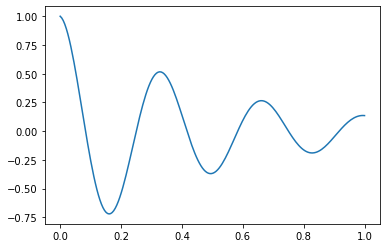

In [5]:
plt.plot(data_x, true_y)

### Histogram

Let us imagine that the physical process that we want to study is affected by experimental noise.

Here we have gaussian noise with zero mean.

In [6]:
average, sigma = 0, 0.15
noise = np.random.normal(average, sigma, n_points)

Let's check the shape of this noise. We can easily compute the histogram of the values inside the array. It should look like the usual bell-shaped curve:

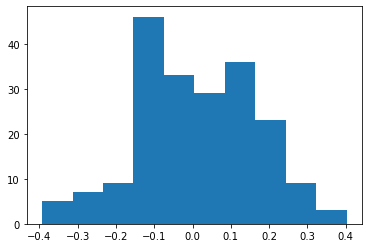

In [7]:
counts, bins, h = plt.hist(noise)

Note that the histogram returns the list of counts for each bin, `counts`, and the edges of the bins, `bins`.
For example:



In [8]:
print(f"There are {counts[4]} counts in the interval [{bins[4]}, {bins[5]}]")

There are 33.0 counts in the interval [-0.07489689528078419, 0.004633627307817079]


### Dispersion plot

The data that we observe from our measurements is therefore the true function `f(x)` plus the `noise`.

In [9]:
data_y = true_y + noise
# Again the fact that the sum between numpy arrays works element-wise
# allows us to get result without "unpacking" the array.

The result of our measurement is therefore the following dispersion graph, that can be plotte with the method `scatter()`.

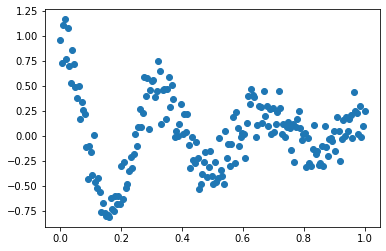

In [10]:
plt.scatter(data_x, data_y)

### Heatmap plot

Sometimes we want to plot 2D-functions. One way is to plot them as a heatmap, where the color of a given point is proportional to the value of the function there.
Let us plot the function $f(x,y) = \sin(2\pi x)/(1+y)^2$ as a heatmap.
A simple way is to create a grid of $(x_i,y_i)$ points, and compute for each of them $z_{ij} = f(x_i, y_i)$. 
We can plot the matrix $Z$ with the `heatmap` function.

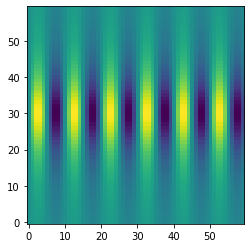

In [11]:
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.sin(X*2*np.pi)/(1 + Y**2)

plt.imshow(Z, origin='lower')

Regarding the data created above, we can produce a 2d-histogram.



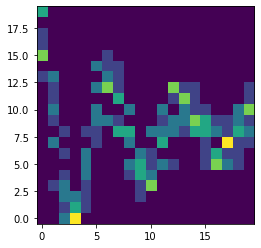

In [12]:
counts, _, _ = np.histogram2d(data_x, data_y, bins=20)
plt.imshow(counts.transpose(), origin="lower")

## Plot customization

### Labels and range

You are a physiscist! You know that you have to write the quantities your are plotting to make other people understand..

Below it is shown how to put labels on the axis, a title, and how to change th range of x and y to show in the canvas.

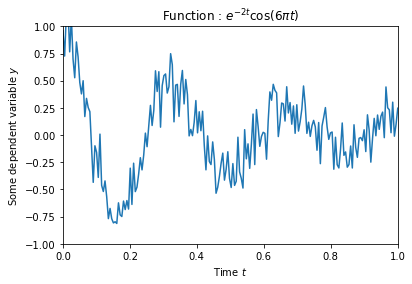

In [13]:
#  Title
plt.title("Function : $e^{-2t}\cos(6\pi t)$")
# x label
plt.xlabel("Time $t$")
# y label
plt.ylabel("Some dependent variable $y$")
# Setting the x range
plt.xlim([0, 1])
# Setting the y range
plt.ylim([-1, 1])

plt.plot(data_x, data_y)


Note that you can use Latex synthax within the dollar symbols!

### Lines and markers

The plotting functions, e.g. plot or scatter, accept a huge number of properties that allows to customize your graph.

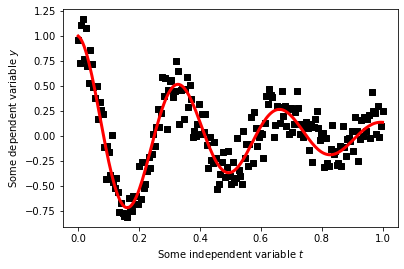

In [14]:
plt.xlabel("Some independent variable $t$")
plt.ylabel("Some dependent variable $y$")
# Two plotting functions in the same pyplot environment are plotted together in the same canvas
plt.plot(data_x, true_y, linewidth=3, color="red")
plt.scatter(data_x, data_y, marker="s", color="black")


We changed the line witdh (`linewidth` or `ls`), the colors (`color` or `c`), and the marker shape (`marker`). See the official matplotlib documentation to explore other possibilities. For example how to change the line style (`linestyle`) or the marker size (`size`).

### Legend

Multiple elements in the same plot need a legend. It requires a label for each graphic element that you are generating and the method `legend()`.

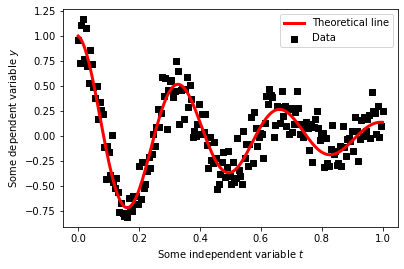

In [15]:
plt.xlabel("Some independent variable $t$")
plt.ylabel("Some dependent variable $y$")
# Labels inside the graphical objects
plt.plot(data_x, true_y, linewidth=3, color="red", label="Theoretical line")
plt.scatter(data_x, data_y, marker="s", color="black", label="Data")

# Legent keyword
plt.legend()

## Multiple plots

You can draw different plots in the same figure. The easiest way is to:
* declare that you are building a figure with `plt.figure()`.
* Before each sub-plot call the method `plt.subplot(i,j,n)`, where:
> * `i` is the number of plots in rows
> * `j` is the number of plots in columns
> * `n` is the plot number

For example:

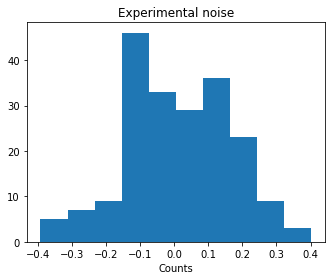

In [16]:
# Here you can specify the tot size of the figure
fig = plt.figure(figsize=(9,4))

# Setting the x range
plt.title("Physical law")
plt.xlabel("Some independent variable $t$")
plt.ylabel("Some dependent variable $y$")
plt.xlim([0, 1])
# Setting the y range
plt.ylim([-1, 1])
plt.plot(data_x, true_y, linewidth=3, color="red", label="Theoretical line")
plt.scatter(data_x, data_y, marker="s", color="black", label="Data")
plt.legend()

plt.subplot(122)
plt.title("Experimental noise")
plt.xlabel("Noise amount")
plt.xlabel("Counts")
counts, bins, h = plt.hist(noise)

# This method allows for a better alignments of all the elements
plt.tight_layout()


## Saving plot

Often you will need to save a plot for future use. We can do that as follows.
Recall how you can create a folder (for example `'./figures'`) using the left menu.

In [17]:
fig_name = "./img/test.png"
fig.savefig(fig_name, format="png", bbox_inches="tight", pad_inches=0.4, dpi=600)
plt.close()

If you save them locally only, remember that they will be lost when the colab notebook is disconnected.
Remember to download them if you don't want that!

# Exercises (optional)

1. A single die has 6 faces, and returns a value $X = 1, 2 \dots 6$ with probability $p=1/6$. That means that on average one sixth of all dices thrown should show 1, one sixth 2 etc. etc.
If two dices are thrown, the distribution is different of the sum of the two dices is quite different.
Using numpy random generators and matplotlib functions, calculate plot the empirical (i.e. using a very large numbers of dice thrown) distribution of the normalized sum (i.e. manipulate the sum such that it has zero mean and standard deviation $\sigma=1$) for 1, 2 and 100 dices in three separate plots.
Plot a normal gaussian overlying the different distributions. What is happening?

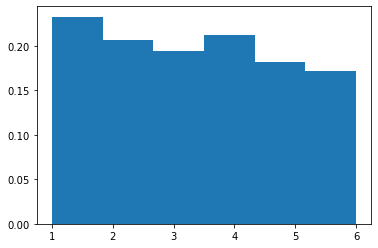

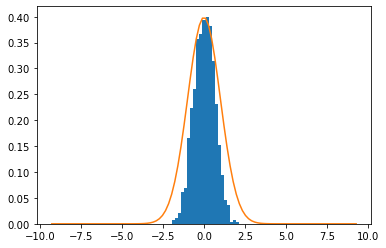

In [21]:
n = 1000
n_d = 1
faces = 6
dice = np.random.randint(1, 7, size=n)
plt.hist(dice, bins=faces*n_d, density=True)
plt.show()

n_d = 100
dices = np.sum(np.random.randint(1, 7, size=(n_d, n)), axis=0)
bins = np.linspace(n_d, faces*n_d, num=max(faces, n_d), endpoint=True,
                   dtype=float)
hist, _ = np.histogram(dices, bins=bins)
bins -= (faces*n_d - n_d)/2 + n_d
bins /= hist.std()
plt.hist(bins[:-1], bins, weights=hist*0.4/max(hist))

gauss = 1/np.sqrt(2*np.pi)*np.exp(-bins**2/2)
plt.plot(bins, gauss)
plt.show()

2. Heatmaps are also very useful to visualize distance matrices (or correlation matrices). 
Redo using numpy notation the Exercise 4 from Lesson 2 - the problem with distances in DNA strains. Plot the distance matrix as a heatmap.
(open question:) 
Is there some structure into it?
Can you imagine a way to better visualize such structure, if any?

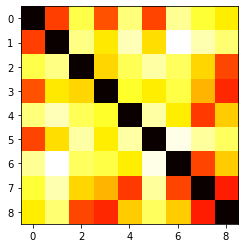

[[0.   0.31 0.55 0.33 0.58 0.32 0.6  0.54 0.49]
 [0.31 0.   0.59 0.48 0.63 0.47 0.68 0.62 0.58]
 [0.55 0.59 0.   0.46 0.56 0.61 0.57 0.46 0.32]
 [0.33 0.48 0.46 0.   0.53 0.49 0.55 0.43 0.29]
 [0.58 0.63 0.56 0.53 0.   0.61 0.49 0.31 0.45]
 [0.32 0.47 0.61 0.49 0.61 0.   0.66 0.61 0.57]
 [0.6  0.68 0.57 0.55 0.49 0.66 0.   0.31 0.45]
 [0.54 0.62 0.46 0.43 0.31 0.61 0.31 0.   0.28]
 [0.49 0.58 0.32 0.29 0.45 0.57 0.45 0.28 0.  ]]


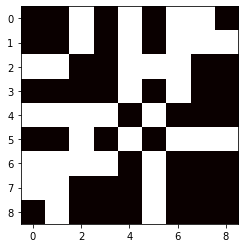

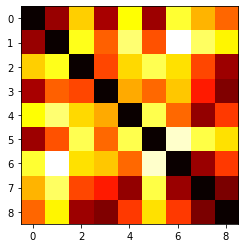

[[0.   0.1  0.31 0.11 0.34 0.1  0.36 0.29 0.24]
 [0.1  0.   0.35 0.23 0.39 0.22 0.46 0.38 0.33]
 [0.31 0.35 0.   0.21 0.32 0.38 0.32 0.21 0.1 ]
 [0.11 0.23 0.21 0.   0.28 0.24 0.3  0.18 0.08]
 [0.34 0.39 0.32 0.28 0.   0.38 0.24 0.09 0.2 ]
 [0.1  0.22 0.38 0.24 0.38 0.   0.43 0.37 0.32]
 [0.36 0.46 0.32 0.3  0.24 0.43 0.   0.1  0.2 ]
 [0.29 0.38 0.21 0.18 0.09 0.37 0.1  0.   0.08]
 [0.24 0.33 0.1  0.08 0.2  0.32 0.2  0.08 0.  ]]
Suspicious weighted graph
{'G': {'G': 0.24963768115942028, 'T': 0.25217391304347825, 'A': 0.23780193236714975, 'C': 0.2603864734299517}, 'T': {'G': 0.24963768115942028, 'T': 0.25217391304347825, 'A': 0.23780193236714975, 'C': 0.2603864734299517}, 'A': {'G': 0.24963768115942028, 'T': 0.25217391304347825, 'A': 0.23780193236714975, 'C': 0.2603864734299517}, 'C': {'G': 0.24963768115942028, 'T': 0.25217391304347825, 'A': 0.23780193236714975, 'C': 0.2603864734299517}}
Letter occurance ratio
{'G': 0.24936663047412233, 'T': 0.25262395946435034, 'A': 0.23790565810109784

In [19]:
with open("../Lesson2/data_4.txt", "r") as fobj:
  lines = []
  i = -1
  for l in fobj.readlines():
    if l.startswith(">"):
      i += 1
      lines.append("")
    else:
      lines[i] += l[:-1]
lines = [np.array(list(l)) for l in lines]
len_l = len(lines[0])

M = np.array([[sum(i != j)/len_l for j in lines] for i in lines])
plt.imshow(M, cmap="hot")
plt.show()
print(np.round(M, 2))
plt.imshow(M > 0.5, cmap="hot")
plt.show()
plt.imshow(M.T*M, cmap="hot")
plt.show()
print(np.round(M.T*M, 2))

letters = set(lines[0])
L = dict.fromkeys(letters, 0)
letters = dict.fromkeys(letters, dict.fromkeys(letters, 0))
for l in lines:
  a = l[0]
  L[a] += 1
  for i in l[1:]:
    letters[a][i] += 1
    a = i
    L[a] += 1
for i, val in letters.items():
  tot = sum(val.values())
  for j in val.keys():
    letters[i][j] /= tot

print("Suspicious weighted graph")
print(letters)
tot = sum(L.values())
for i in L.keys():
  L[i] /= tot
print("Letter occurance ratio")
print(L)

print("Conclusion: It is wierd its not following some redundancy for error correction as described")
print(r"https://cs.stanford.edu/people/eroberts/courses/soco/projects/1999-00/information-theory/redundancy_5.html#:~:text=The%20formula%20for%20redundancy%20is,is%20always%20less%20than%201).")
